# UNIVERSITY ADMISSION PREDICTION - PHASE 1

## SRUTHI SHYAM                                                      AM.EN.U4CSE19055

#### The aim of this project is to find out the factors that influence the chance of admission the most and also to predict the chance of admission of students in  their dream univeristy

#### The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :

#### GRE Scores ( out of 340 )

#### TOEFL Scores ( out of 120 )

#### University Rating ( out of 5 )

#### Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

#### Undergraduate GPA ( out of 10 )

#### Research Experience ( either 0 or 1 )

#### Chance of Admit ( ranging from 0 to 1 )

# Loading CSV file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("admissionOriginal.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


# Data cleaning and summarization

Removed the irrelavent Serial No column and checked for any null values in the dataset aslo checked the data type of each feature

In [70]:
data = data.drop(columns="Serial No.") ##removed serial number column
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [32]:
data.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

## Data Visualization 

#### Using a histogram plot all features to get their count

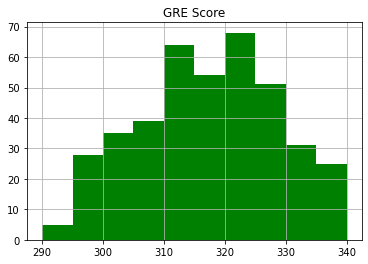

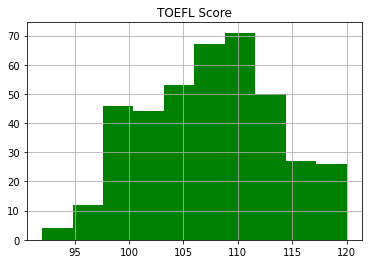

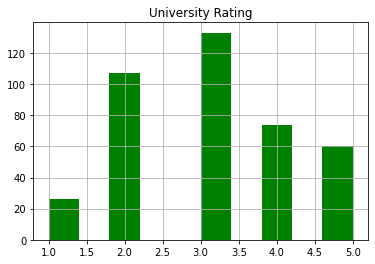

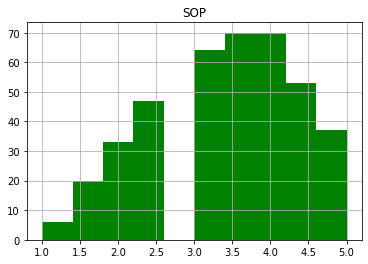

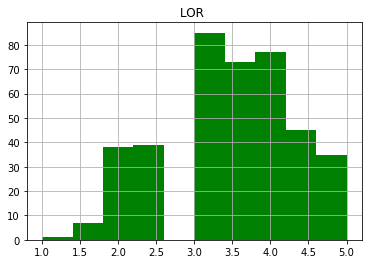

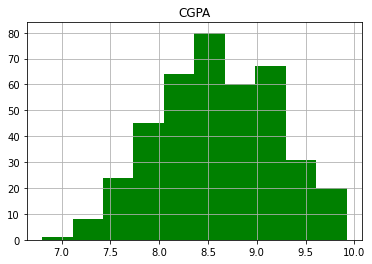

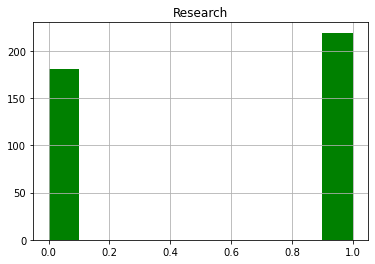

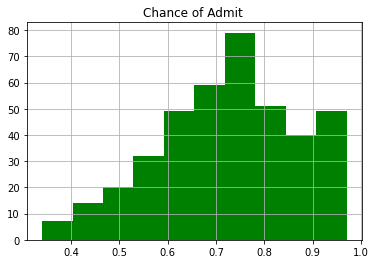

In [12]:
for col in data:
     data.hist(column=col,color='g')

#### Scatter plot to show relationship between the independent features

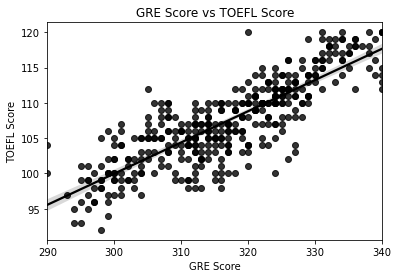

In [22]:
sns.regplot(x='GRE Score',y='TOEFL Score',data=data,color='black')
plt.title("GRE Score vs TOEFL Score")
plt.show()

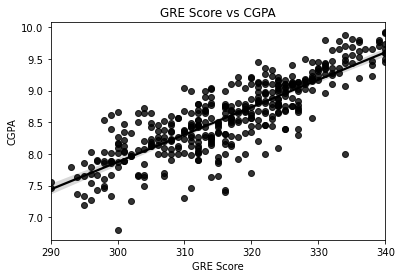

In [23]:
sns.regplot(x='GRE Score',y='CGPA',data=data,color='black')
plt.title("GRE Score vs CGPA")
plt.show()

#### Plot all the independent features against the dependent feature ie, Chance of Admit using scatter plot.

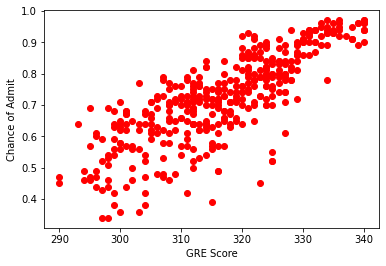

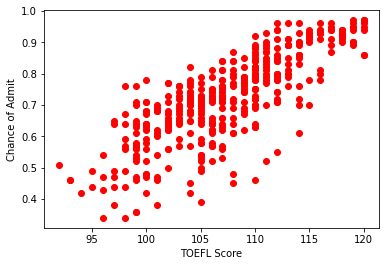

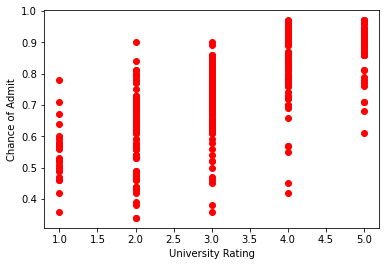

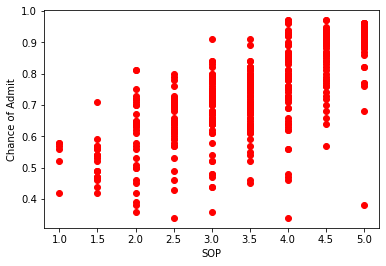

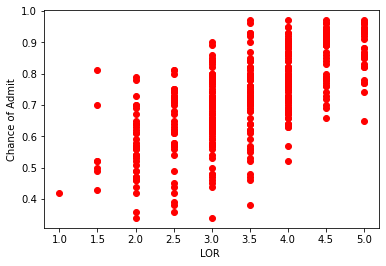

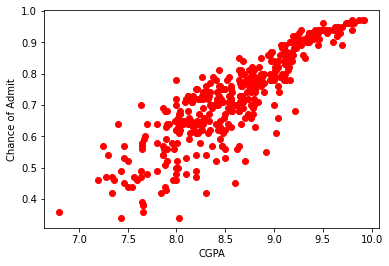

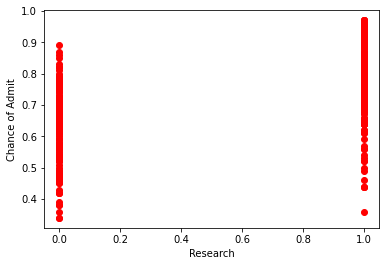

In [37]:
for col in data.drop(columns=['Chance of Admit ']):
    plt.scatter(data[col], data['Chance of Admit '],color='r')
    plt.xlabel(col)
    plt.ylabel("Chance of Admit")
    plt.show()

In [40]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

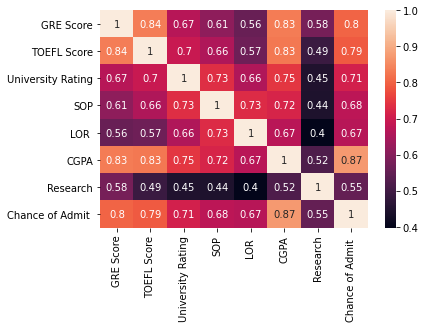

In [16]:
sns.heatmap(data.corr(),annot=True)

## Data Interpretation

We can see that majority of the students who have applied come from a university with 3 star rating with cgpa of 8.5 and decent GRE and TOEFL scores . Most of the students that applied have experience in reaserach as well and majority of the applied students  had 70 to 80% chance of getting admission

Students with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable.
Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

From the above graphs it is clear that CGPA,GRE score and TOEFL score are the most important factors for  admission

## Converting the cleaned dataframe to csv file

In [25]:
data.to_csv("admissionCleaned.csv", encoding = 'utf-8' , index=False)